When regressing $Y$ on $X$, we assume that there is approximately a linear relationship between $X$ and $Y$
$$ \hat{y} \approx \hat{\beta_0} + \hat{\beta_1}X \tag{Eq. 1}$$
Here, coefficient or parameter $\beta_0$ represents the intercept and $\beta_1$ represents the slope.

Before we can make predictions with equation, we must derive $\hat{\beta_0}$ and $\hat{\beta_1}$ by training our model. We want to find the model that is 'closest' to the points in our training dataset. There are multiple ways of measuring closeness, where **least squares** least squares is the most popular one. **Residual Sum of Squares** is defined as:
$$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n} \tag{Eq. 2}$$ 
In Equation Eq. 2, $e_{1}$ is the difference between the actual $y_1$ and our prediction $\hat{y_1}$

Standard error:
$$Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n} \tag{Eq. 3}$$
Where $\sigma$ is the standard deviation of each of the realizations $y_i$ of $Y$. Roughly speaking, the standard error tells us the average amount that estimate $\hat{\mu}$ differs from the actual value of $\mu$

The estimate of $\sigma$ is the **Residual Standard Error (RSE)**
$$RSE = \sqrt{\frac{RSS}{(n-2)}} = \sqrt{\frac{1}{n-1}\sum^n_{i=1}(y_i-\hat{y}_i)^2}$$
RSE is an absolute measure of lack of fit and therefore its height is context dependent

The $R^2$ statistic is an proportional measure of fit, which is a value between 0 and 1, and independent of the scale of the output value $Y$:
$$R^2 = \frac{TSS-RSS}{TSS}$$

Where $TSS = \sum(y_1-\bar{y}^2)$, is the total sum of squares. A large v$R^2$ value indicates that a large proportion of the variability in the response is explained by the regression. A number near 0 indicates that the regression does not explain much of the variability in the respons; this might occur because the linear model is wrong or the error variance $\sigma^2$ is high, or both.

**Drop the below?**

A 95\% confidence interval is defined as a range of values such that with 95\% probability, the range will contain the true unknown of the parameter

Null hypothesis -> $H_0$: There is no relationship between X and Y, $\beta_1 = 0$

Alternative hypothesis -> $H_a$: There is some relationship between X and Y, $\beta_1 \neq 0$

To do
- $R^2$
- confidence interval?
- hypothesis test?
- null hypothesis?
- t-statistic?
- p-value?
- Correlation?

Multiple linear regression, extending simple linear regression to directly accomodate multiple predictors. This is achieved by giving each predictor a separate slope coefficient in a single model:
$$Y = \beta_ 0 + \beta _1  x_1 + \beta_2x_2 + ... + \beta_p X_p + \epsilon$$
Here $X_j$ represents the $j$ th predictor and $\beta_j$ quantifies the association between that variable and the response. The parameters are estimated using the same least squares approach that was applied for simple linear regression; we choose them by minimizing the sum of squared 

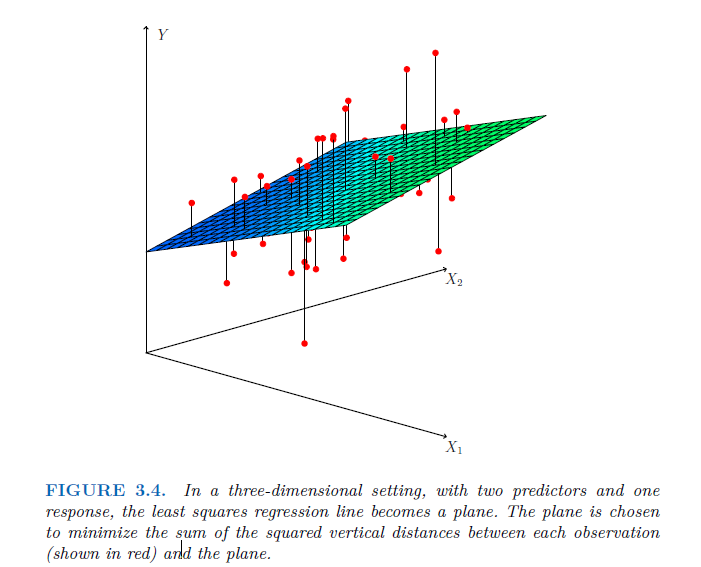

Example below table 3.5: Multiple linear regression might imply that investing in newspaper ads doesn't result in more sales, while simple linear regression implies that it does. When looking in the correlation matrix, we see that radio is correlated with news papers. The simple linear regression does not consider other media, hence it believes that newspaper investments result in more sales, while this is actually caused by radio investments. Here we call newspaper advertising is a surrogate for radio advertising.

Important questions to ask when applying multiple linear regression:
1. Is at least one of the predictors useful in predicting the response?
2. Do all the predicitors help to explain Y, or is only a subset of predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

### Normal distributions

Normal distributions are drawn in such a way that 95% of the measurements fall between +/- 2 standard deviations around the mean

Evaluation metrics
- see bottom page 66 statquest


To do:
- Assignment regression (linear, multinomial and polynomial)
- Prep presentation

## Lab 3

In [1]:
from ISLP import load_data
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)
import matplotlib.pyplot as plt

In [2]:
boston = load_data("Boston")
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [3]:
X = pd.DataFrame({'intercept': np.ones(boston.shape[0]),
                  'lstat': boston.lstat})
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


### option to split train and test
### option to use cross validation

In [4]:
y = boston.medv
model = sm.OLS(y, X)
results = model.fit()

In [5]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


- coef column is clear, mdev = 34.5 - 0.95*lstat
- std err, standard error = 
$$\sigma_{\hat{x}} = \frac{\sigma}{\sqrt{n}}$$

$$\sigma = \sqrt{\frac{\sum(x-\mu)^2}{N}}

In [6]:
design = MS(['lstat'])
design = design.fit(boston)
X = design.transform(boston)
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        17:47:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [10]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [14]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [15]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

What does confidence interval mean below? 95% of actual mdev values related to lstat will fall within the confidence interval

In [16]:
new_predictions.conf_int(alpha = 0.05, obs=True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

What is the difference beteween confidence interval and prediction interval?

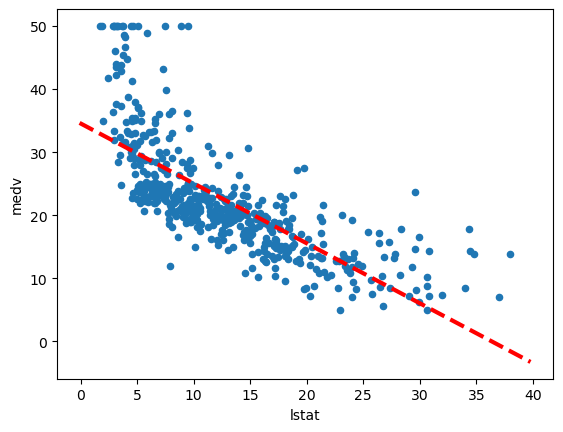

In [17]:
def abline(ax, b, m, *args , **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim , *args , **kwargs)

ax = boston.plot.scatter('lstat', 'medv')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

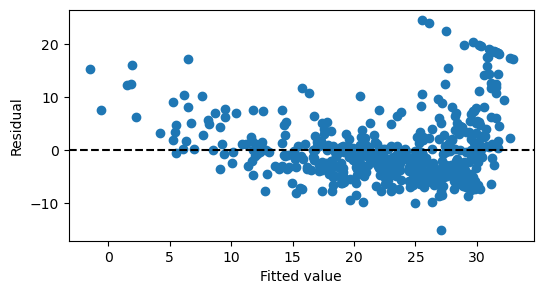

In [19]:
ax = plt.subplots(figsize=(6,3))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

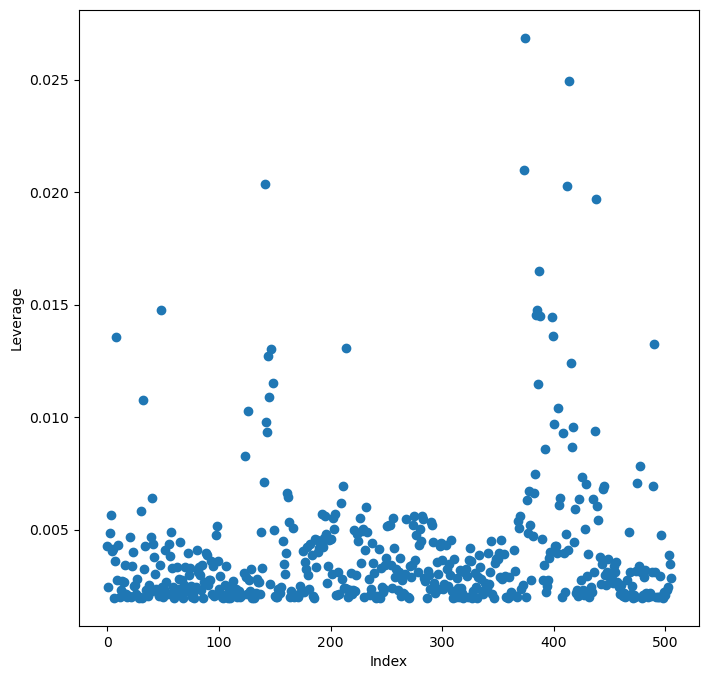

In [31]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

What are leverage statistics?

### Lab 3, Multiple Linear Regression

In [20]:
X = MS(['lstat', 'age']).fit_transform(boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [22]:
terms = boston.columns.drop('medv')
X = MS(terms).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [24]:
minus_age = boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [32]:
X = boston['lstat']
y = boston['medv']

reg = LinearRegression()
reg.fit(X[:, None], y.values)

C:\Users\LuukvanRoessel\AppData\Local\Temp\ipykernel_22676\3039189961.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(X[:, None], y.values)


LinearRegression()

If we want to know the mean of a population $\mu$, but we only have access to a subset, we can calculate the mean of the subset $\hat{\mu}$, which will serve as an estimate of the mean of the population $\mu$. $\hat{\mu}$ will never be \$\mu$, but if we take the mean of multiple samples, $\hat{\mu}$ will get closer to the actual $\mu$. The same applies for $\beta_0$ and $\beta_1$

Linear regression

*Given the level of detail this month, I'll address topics cross validation, feature engineering, ..., in upcoming months

1. Estimating the coefficients
2. Assessing the accuracy of the coefficient estimates
    - Standard error $\hat{\beta_0}$ and $\hat{\beta_1}$
    - Optionally, detailing the confidence intervals for both coefficients: 95% $\hat{\beta_1} \pm 2 * SE(\hat{\beta_1})$
    - Hypothesis tests: H0: there is no relationship between X and Y, e.i. $\hat{\beta_1} = 0$. Ha: there is some relationship between X and Y, e.i. $\hat{\beta_1} \neq 0$
    - You can confidentely reject the H0 test by calculating the t-statistic, which compares $\hat{\beta_1}$ with its standard error.
    - Low p-value allows us to reject the null hypothesis
3. Assessing the accuracy of the model
    - Residual standard Error
    - $R^2$ statistic
    - F-statistic?
4. Apply linear regression action plan
5. Pittfalls in the data

Questions
- What are leverage statistics?
- What is the differenc ebetween a confidence interval and a prediction interval?


In [3]:
from scipy.interpolate import CubicSpline
import numpy as np

x = np.array([0, 2, 4, 6])
y = np.array([2, 6, 8, 7])
spl = CubicSpline(x, y)

In [9]:
xs = np.linspace(0, 6, 100)

In [11]:
spl(xs)

array([2.        , 2.14095037, 2.28095463, 2.41998497, 2.55801356,
       2.69501257, 2.83095417, 2.96581054, 3.09955385, 3.23215627,
       3.36358999, 3.49382716, 3.62283997, 3.75060059, 3.87708119,
       4.00225394, 4.12609103, 4.24856462, 4.36964688, 4.48931   ,
       4.60752613, 4.72426747, 4.83950617, 4.95321442, 5.06536439,
       5.17592824, 5.28487817, 5.39218633, 5.4978249 , 5.60176605,
       5.70398197, 5.80444482, 5.90312677, 6.        , 6.09503668,
       6.188209  , 6.27948911, 6.36884919, 6.45626142, 6.54169797,
       6.62513102, 6.70653273, 6.78587528, 6.86313085, 6.9382716 ,
       7.01126972, 7.08209737, 7.15072673, 7.21712998, 7.28127928,
       7.3431468 , 7.40270473, 7.45992524, 7.5147805 , 7.56724267,
       7.61728395, 7.6648765 , 7.70999249, 7.75260409, 7.79268349,
       7.83020285, 7.86513436, 7.89745017, 7.92712246, 7.95412342,
       7.97842521, 8.        , 8.01881997, 8.0348573 , 8.04808415,
       8.0584727 , 8.06599512, 8.07062359, 8.07233028, 8.07108